In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 95% 155M/163M [00:02<00:00, 54.8MB/s]
100% 163M/163M [00:02<00:00, 65.5MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


###Importing the Dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3582.jpg', 'with_mask_569.jpg', 'with_mask_287.jpg', 'with_mask_3222.jpg', 'with_mask_1119.jpg']
['with_mask_2462.jpg', 'with_mask_315.jpg', 'with_mask_2946.jpg', 'with_mask_1938.jpg', 'with_mask_1656.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1943.jpg', 'without_mask_794.jpg', 'without_mask_910.jpg', 'without_mask_1851.jpg', 'without_mask_2813.jpg']
['without_mask_1143.jpg', 'without_mask_2828.jpg', 'without_mask_3402.jpg', 'without_mask_764.jpg', 'without_mask_533.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


###Creating Labels for the two class of Images
#### with mask --> 1

#### without mask --> 0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### Displaying the Images

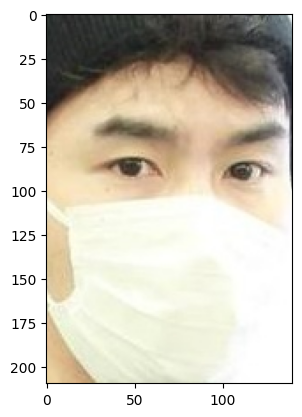

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_315.jpg')
imgplot = plt.imshow(img)
plt.show()

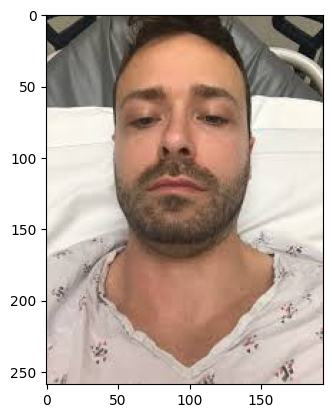

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_794.jpg')
imgplot = plt.imshow(img)
plt.show()

### Image Processing

#### 1.Resize the Images

#### 2.Convert the images to numpy arrays

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data[0]

array([[[ 67, 109, 159],
        [ 67, 109, 159],
        [ 67, 109, 159],
        ...,
        [ 75, 119, 168],
        [ 75, 119, 168],
        [ 75, 119, 168]],

       [[ 66, 108, 158],
        [ 66, 108, 158],
        [ 66, 108, 158],
        ...,
        [ 74, 118, 167],
        [ 74, 118, 167],
        [ 74, 118, 167]],

       [[ 66, 107, 157],
        [ 66, 107, 157],
        [ 66, 107, 157],
        ...,
        [ 73, 116, 166],
        [ 73, 116, 166],
        [ 73, 116, 166]],

       ...,

       [[254, 254, 254],
        [195, 195, 195],
        [207, 207, 207],
        ...,
        [245, 245, 245],
        [215, 215, 215],
        [189, 189, 189]],

       [[253, 253, 253],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [253, 253, 253]]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


### Train Test Split

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [33]:
X_train[0]

array([[[ 57,  57,  67],
        [ 56,  56,  66],
        [ 56,  56,  66],
        ...,
        [105, 102, 107],
        [113, 110, 115],
        [114, 112, 117]],

       [[ 53,  53,  63],
        [ 53,  53,  63],
        [ 54,  54,  64],
        ...,
        [ 83,  79,  85],
        [ 91,  87,  92],
        [ 87,  82,  88]],

       [[ 55,  55,  65],
        [ 58,  58,  68],
        [ 60,  60,  70],
        ...,
        [ 80,  73,  80],
        [ 76,  69,  76],
        [ 74,  68,  74]],

       ...,

       [[206, 194, 199],
        [205, 193, 199],
        [207, 194, 200],
        ...,
        [ 72,  67,  64],
        [ 92,  87,  84],
        [110, 104, 104]],

       [[205, 192, 201],
        [205, 192, 199],
        [205, 192, 199],
        ...,
        [ 83,  78,  75],
        [109, 104, 101],
        [123, 117, 117]],

       [[202, 189, 198],
        [203, 190, 199],
        [202, 189, 197],
        ...,
        [ 82,  77,  74],
        [103,  98,  95],
        [110, 104, 104]]

In [34]:
X_train_scaled[0]

array([[[0.22352941, 0.22352941, 0.2627451 ],
        [0.21960784, 0.21960784, 0.25882353],
        [0.21960784, 0.21960784, 0.25882353],
        ...,
        [0.41176471, 0.4       , 0.41960784],
        [0.44313725, 0.43137255, 0.45098039],
        [0.44705882, 0.43921569, 0.45882353]],

       [[0.20784314, 0.20784314, 0.24705882],
        [0.20784314, 0.20784314, 0.24705882],
        [0.21176471, 0.21176471, 0.25098039],
        ...,
        [0.3254902 , 0.30980392, 0.33333333],
        [0.35686275, 0.34117647, 0.36078431],
        [0.34117647, 0.32156863, 0.34509804]],

       [[0.21568627, 0.21568627, 0.25490196],
        [0.22745098, 0.22745098, 0.26666667],
        [0.23529412, 0.23529412, 0.2745098 ],
        ...,
        [0.31372549, 0.28627451, 0.31372549],
        [0.29803922, 0.27058824, 0.29803922],
        [0.29019608, 0.26666667, 0.29019608]],

       ...,

       [[0.80784314, 0.76078431, 0.78039216],
        [0.80392157, 0.75686275, 0.78039216],
        [0.81176471, 0

### Building a Convolutional Neural Networks (CNN)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [37]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 159s 920ms/step - loss: 0.4883 - acc: 0.7971 - val_loss: 0.2957 - val_acc: 0.8860
Epoch 2/5
170/170 [==============================] - 140s 822ms/step - loss: 0.2866 - acc: 0.8900 - val_loss: 0.2698 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 138s 815ms/step - loss: 0.2269 - acc: 0.9180 - val_loss: 0.2656 - val_acc: 0.8975
Epoch 4/5
170/170 [==============================] - 140s 825ms/step - loss: 0.2035 - acc: 0.9229 - val_loss: 0.2330 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 137s 805ms/step - loss: 0.1573 - acc: 0.9399 - val_loss: 0.2252 - val_acc: 0.9240


### Model Evaluation

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 235ms/step - loss: 0.1912 - acc: 0.9292
Test Accuracy = 0.9291859865188599


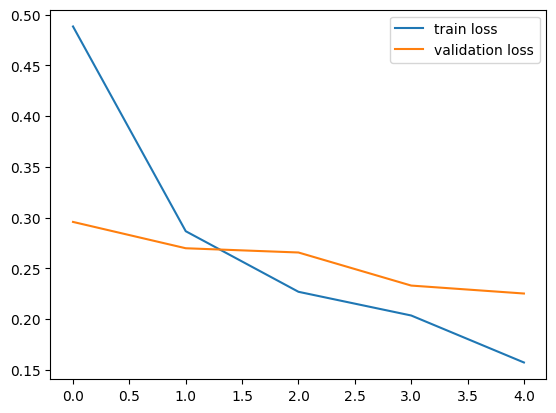

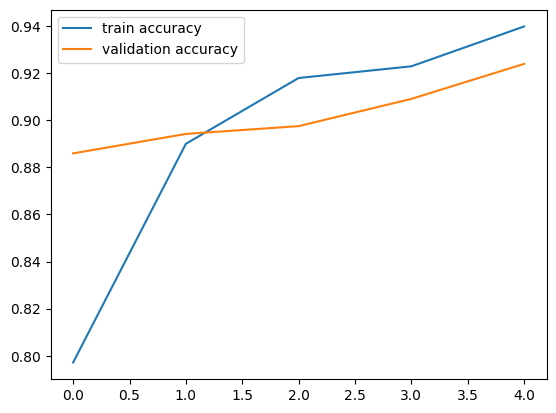

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

### Predictive System

Path of the image to be predicted: /content/mask.jpeg


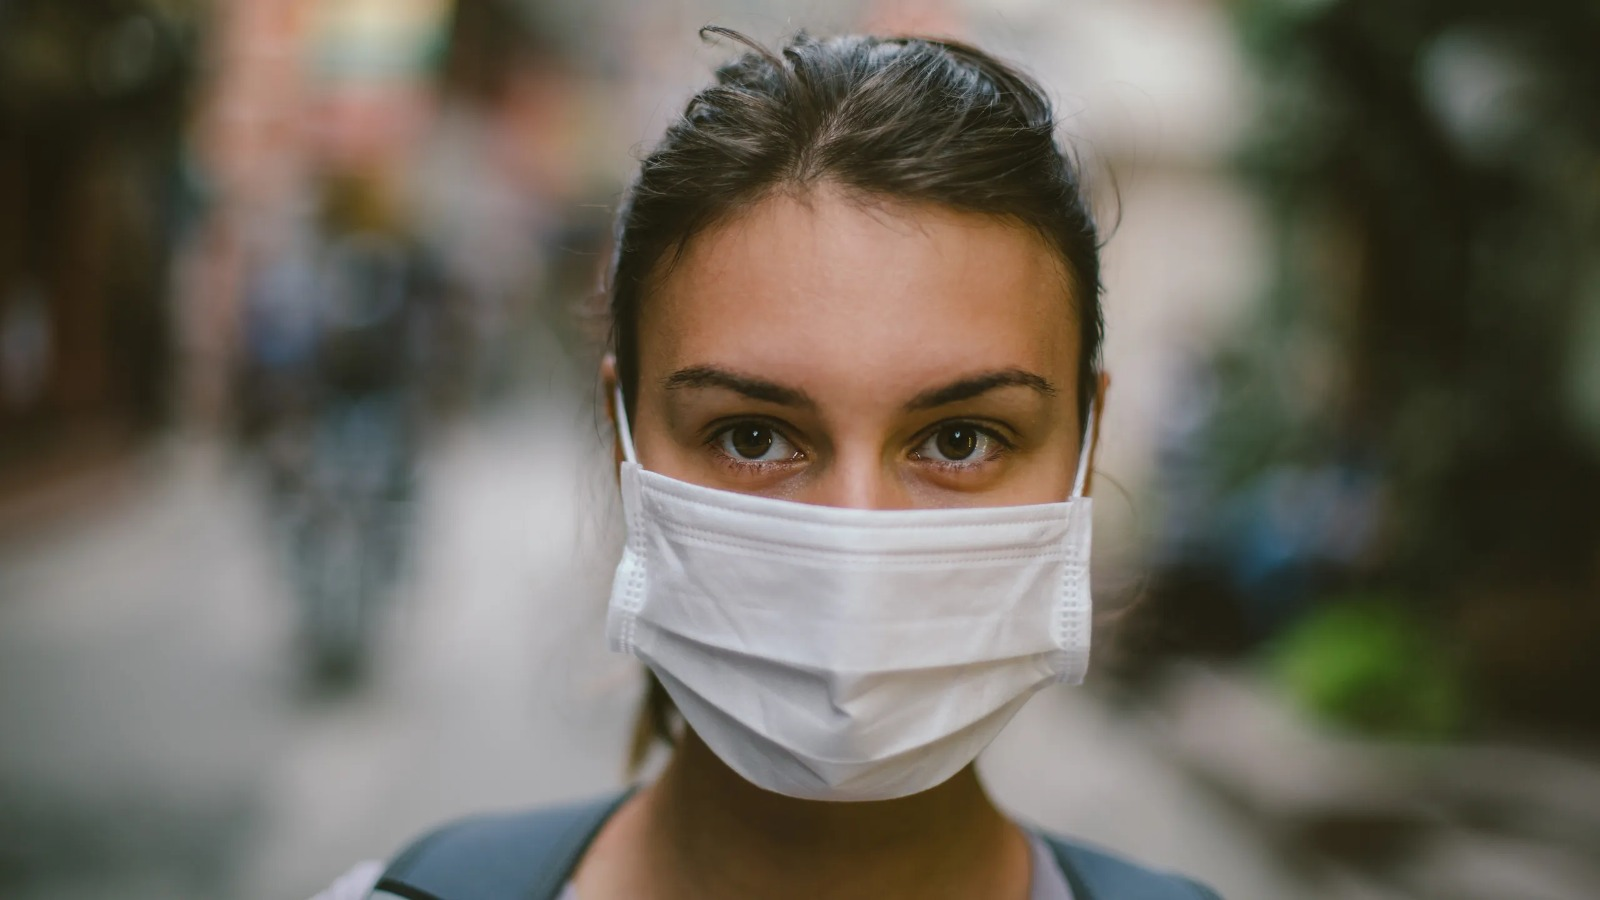

1/1 [==============================] - 0s 214ms/step
[[0.3123306 0.6081952]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')